**BERT** is one the hottest model architecture which is widely used for solving different Natural Langugage Processing (NLP) tasks nowadays. So, it is very important to gain a in depth knowledge about this model. You will find several blogs, tutorials etc. on BERT. But it is very rare to find a complete package to understand the full model. In this notebook I try to merge several popular blogposts and tutorials to make a complete package.

Hope that, this notebook gives you a better undestanding on BERT. The links of those blogposts and tutorials are given in  the [References](#8) section. Check out those links for more details. 



<h2><center>Let's Start</center></h2>  

Today we are going to talk about bert.

$\;\;\;\;\;\;\;\;$ 
<center><img src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1557559619l/5674402.jpg"/ width="300" height="300" ></center>

$\;\;\;\;\;\;\;\;$

No, no, we are going to talk about Google BERT. 

<a class="anchor" id="0.1"></a>
#  Table of Contents
i.  [BERT, What is BERT !](#1)

ii.  [High Level Overview of BERT](#2)

iii.  [How BERT comes and why it becomes so popular ?](#3)

   - [Limitation of Transformer](#3.1)
   - [Transfer Learning of NLP](#3.2)
   - [Fully Replacement of LSTM](#3.3)


iv. [What is inside the BERT ?](#4)

   - [From Word to Vectors](#4.1)
   - [Encoder from the Transformer](#4.2) 
   - [Maksed Language Modeling](#4.3)
   - [Next Sentence Prediction ](#4.4)


v. [BERT as Transfer Learning in NLP](#5)


vi. [BERT for Different NLP tasks](#6)

   - [Sentence Pair Classification Task](#6.1)
   - [Single Sentence Classfication Task](#6.2)
   - [Question Answering Task](#6.3)
   - [Single Sentence Tagging Task](#6.4)


vii. [Applications](#7)


viii. [References](#8) 



# 1. BERT, What is BERT ! <a class="anchor" id="1"></a>

**BERT** (**B**idirectional **E**ncoder **R**epresentations from **T**ransformers) is awesome research in Natural Language Processing (NLP) published by researchers at Google AI Language in 2018. It has caused a stir in the Machine Learning community by presenting state-of-the-art results in a wide variety of NLP tasks, including Neural Machine Translation, Question Answering (SQuAD v1.1), Sentence Pair Classification task (MNLI), Sentiment Analysis, Text Summarization and others.
From the abbreviation of the BERT, we can figure out some kind of feature of it.

   1. It is Bi-directional 
   2. It uses an Encoder Representation 
   3. It has a Transformer based architecture 

So basically, BERT’s key technical innovation is applying the bidirectional training of Transformer, a popular attention model, to language modeling. This is in contrast to previous efforts which looked at a text sequence either from left to right or combined left-to-right and right-to-left training. The paper’s results show that a language model that is bi-directionally trained can have a deeper sense of language context and flow than single-direction language models. In the paper, the researchers detail a novel technique named Masked Language Modelling (MLM) which allows bidirectional training in models in which it was previously impossible. We will walk through all the details later in this material.


$\;\;\;\;\;\;$ 

<center>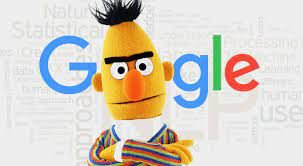<\center>

$\;\;\;\;\;\;$ 



[Back to Table of Contents](#0.1)

# 2. High Level Overview of BERT <a class="anchor" id="2"></a>

Now, let's look at a *high-level* overview of the **BERT architecture**. It is a **Transformer** based model architecture, which opens a new era to work with NLP tasks. In the last session, we learned about the Transformer. A transformer is an Encoder-Decoder model architecture that also uses positional encoding, self-attention, multi-head attention, and also with Residual connection.

$\;\;\;\;\;\;$ 

<center><img src = "https://glassboxmedicine.files.wordpress.com/2019/08/figure1modified.png?w=451&h=647" width = 400 height = 400 /> <\center>

$\;\;\;\;\;\;$ 

Now, BERT uses only the **Encoder** portion of the Transformer architecure canceling out the Decoder part.Like the Transformer BERT also uses postional encoding, self attention, multi head attention and Residual Connection. It uses exactly same architecture for encoders that is used in the Transformer. In short BERT is basically, **Stacking of Encoders** and the encoder is from the Transformer.  

$\;\;\;\;\;\;$ 

<center><img src = "http://jalammar.github.io/images/bert-encoders-input.png" width = 700 height = 400 /><\center>

$\;\;\;\;\;\;$ 

There are two types of BERT.
 
 1.$BERT$ $base$
    
 2.$BERT$ $large$


In bert_base, it is used tweleve (12) encoder stacking. On the other hand, in bert_large twenty four (24) encoder stacking is used. The types are also different from feedforward-networks (no. of hidden neurons). For the bert_base , 768 neurons are used in the feedforward network where the bert_large uses 1024 hidden units.  

$\;\;\;\;\;\;$ 

<center> <img src = "http://jalammar.github.io/images/bert-base-bert-large-encoders.png" width = 600 height = 350 /> <\center>
    
$\;\;\;\;\;\;$ 
    
[Back to Table of Contents](#0.1)

# 3. How BERT comes and why it becomes so popular ? <a class="anchor" id="3"></a>

Nowadays, BERT has been the first choice to work on solving different NLP tasks. Why has it become so popular in the NLP community? It is not just for the being State Of The Art (SOTA) model but also several reasons behind it. The reasons can be differentiated into three main reasons.
        
   1. Limitations of Transformer 
   2. Transfer Learning in NLP
   3. Fully replacement of LSTM
 

### 1. Limitations of Transformer <a class="anchor" id="3.1"></a>

No doubt, the invention of the transformer in NLP is one of the most powerful and efficient research in the NLP community. It describes the NLP task in a different way for which the NLP model can be trained independently. As a result, **parallelization** is possible and so the training process becomes much faster than LSTM/GRU-based models. It has achieved LSTM/GRU models on different tasks such as machine translation started to make some in the field think of them as a replacement to LSTMs. This was compounded by the fact that Transformers deal with long-term dependencies better than LSTMs.


Ok, it is well designed for the encoder-decoder architecture which is able to solve some NLP tasks like **Machine Translation**. But there are many more tasks which do not use an encoder-decoder architecture just like **Text Classification, Sentence Pair Task** and so on. On that task, how can we use transformers on those tasks? Here is the limitation of the transformer. For this limitation, we can't replace LSTM


### 2.  Transfer Learning in NLP <a class="anchor" id="3.2"></a>

**Transfer learning is the reuse of a pre-trained model on a new problem**. It's currently very popular in deep learning because it can train deep neural networks with comparatively little data. This is very useful in the data science field since most real-world problems typically do not have millions of labeled data points to train such complex models.


Transfer learning is used not only for the faster training process but also for building an efficient model. In computer vision tasks, transfer learning is widely used. A robust model is trained on a huge amount of image data and finds the optimal weights. Then, the model can be used for downstream computer vision tasks as a pre-trained model. So, by adding some NN layers and fine-tuning the pre-trained model, it is easy to build an efficient model on that downstream task. Some pre-trained models in computer vision are VGG-16, ResNet, ImageNet, LeNet, Efficient net, and many more.


For computer vision, we have a very good set of well-trained models on millions of data and they can be used easily to perform object recognition tasks. We can build *a robust and very accurate model with 20 lines of code*. Just  importing a pre-trained model and fine-tuning a few layers will give us the desired result.


$\;\;\;\;\;\;$ 

<center>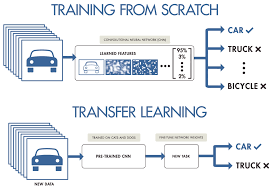</center>

$\;\;\;\;\;\;$ 

Though transfer learning is much more popular and widly using model, but in NLP we've seen very less use of this.For NLP, the process is more complicated, because in NLP different text data contains different contexts. So, to use the transfer larning we need a good contextual language modeling.Contextual language modeling means the context of the sentence (for example, *abide by* and *abide in* have fully different meaning though both use the main word *abide*). More better contextual language modeling we can define, more better model we can build using transfer learning. After many research, some good contextual language model was built like **ELMo** , **ULMFiT** which were become popular. But both of **ELMo**( **E**mbeddings from **L**anguage **Mo**dels) and **ULMFiT**( **U**niversal **L**anguage **M**odel **Fi**ne-**T**uning) were LSTM based. In ELMo, 2 layers of bi-directional LSTM were used and in ULMFit 3 layers of LSTM was used.

$\;\;\;\;\;\;$ 

<center><img src = "https://5b0988e595225.cdn.sohucs.com/images/20180529/0b0036d9bba548bfab470d4ca3d750fe.jpg" width = 500 height = 350 /></center>

$\;\;\;\;\;\;$ 


Here $E_1$, $E_2$, ... $E_N$ is the word embedding and $T_1$, $T_2$, ... $T_N$ is the output of the model

$\;\;$ 

<center><img src = "https://miro.medium.com/max/2128/1*ko2Ut74J_oMxF4jSo1VnCg.png" width = 400 height = 300 /></center>

$\;\;\;\;\;\;$ 

But, what if we can bulid a Language Modeling with transformer in place of LSTM. As transformer is much more faster than LSTM , so we can train much more data to train by which we can define much more better language model. Bascially, a transformer based Language Modeling is needed which also can be used as pre-training model in transfer learning. 

Before BERT, OpenAI introduces their GPT-2 ( **G**enerative **P**re-**T**raining ) model which can solve the problem discussed in previous section. GPT-2 model is transformer based. If we look at the architecture of GPT-2 we will see, GPT-2 use 12 layer stacking of decoder ( unlike BERT, it uses only the decoder ). Encoder of the transformer is cancel out in the model. As, the model use only the decoders so it also cancel out the **Encoder - Decoder Attention** block from the decoder architecture. The rest are remain same. 

$\;\;\;\;\;\;$ 

<center><img src = "http://jalammar.github.io/images/openai-transformer-language-modeling.png" width = 500 height = 600 />
    </center>

$\;\;\;\;\;\;$

We already know that decoder in the transformer uses **masked self attention** to predict the next word for learning. That's why decoder always gives shifted right word as prediciton. It works like the forward LSTM ( from left to right ). As GPT-2 is able to predict the next word for any sentece in the autoregressive way using transformer, so making a language modeling is possible with transformer. 


$\;\;\;\;\;\;$ 


Here $E_1$, $E_2$, ... $E_N$ is the word embedding, $T_1$, $T_2$, ... $T_N$ is the output of the model and **Trm** is Transformer Decoder

$\;\;\;\;\;\;$ 


<center><img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzqbw7d8rNA-FnXKcPPR0hiFC9RFJVi4FkiVSUiETmOIrtQqFo7Uk6cPx8_k1qZ-spuqI&usqp=CAU" width = 300 height = 200 /> </center>

$\;\;\;\;\;\;$

GPT-2 is used as a pre-trained model in transfer learning using transformer. It also becomes able to use the transformer in different NLP tasks. Here is the big picture how to use GPT-2 ( Tansformer ) in different NLP task. For more about GPT-2, you can explore [their blogs. ](https://openai.com/blog/tags/gpt-2/) 


$\;\;\;\;\;\;$ 


<center><img src = "https://www.topbots.com/wp-content/uploads/2019/04/cover_GPT_web.jpg" width = 550 height = 450 /></center>



$\;\;\;\;\;\;$ 


### 3.  Fully Replacement of LSTM <a class="anchor" id="3.3"></a>

In the previous section, we've seen that OpenAI GPT-2 becomes able to replace LSTM in many NLP tasks using transformer. Then, one important question arises that actually GPT-2 is able to replace LSTM totally ? The answer is **NO**. Because, while we using LSTM in our task, we can build more robust and contextual languge modeling using bi-directionality. **Bi-directional LSTM** understands better context in language modeling. As GPT-2 uses only the forward direction ( from left to right ), in some case **Bi-directional LSTM** works much more better by understanding better context of the language. So, we could not replace LSTM fully. Now, there araises one question is it possible to build a model adding **bi-directionality** using the **transformer ?** If it could be done, LSTM would fully replaced by the transformer.

So, there required to build one model which 

   1. **Is capable to use tranformer in all kinds of NLP task ?**
   2. **Can be used as a pre trained model for the downstream task while using transfer learning in NLP ?**
   3. **Is bi-directional and understands the language form left to right and right to left ?**
   4. **Understands deeper and better context of the language**
     


<h2><center>Then BERT said,</center></h2>  


 $\;\;\;\;\;\;$
 
 <center>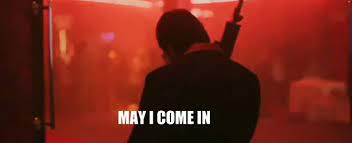</center>
 
 $\;\;\;\;\;\;$ 
 
 [Back to Table of Contents](#0.1)
 
 
 

# 4. What is inside the BERT ? <a class="anchor" id="4"></a>

We've already seen the basic overview of **BERT**. Basically , BERT is the stacking of **Encoders**. Now, it is high time to explain why they use only the encoder ? It is because to use BERT in all kinds of task. Another reason is that we've seen that OpenAI GPT-2 use stacking of decoders. As a result, they would build their model in auto-regressive model (next word prediction). So, they was able to define unidirection (left to right) transformer architecture. To build bi-directional transformer architecture BERT uses encoder from the transformer instead of the decoders. So, BERT build a model for not only left to right but also right to left. A simple overview of BERT is like :-


 $\;\;\;\;\;\;$
 
<center> <img src = "https://miro.medium.com/max/745/1*-oQKmzvHrzqeSQEnM9f_kQ.png" width = 450 height = 450 /></center>

$\;\;\;\;\;\;$


Now, what is inside the BERT ? It is not just the stacking of encoders but also many more. BERT also introduces masked language modeling and next sentence prediciton. There are four major parts of BERT.

 
          1. From Word to Vectors
          2. The Encoders from the transformer
          3. Masked Language Modeling (MLM)
          4. Next Sentence Prediction (NSP)
      
 
It is high time to give a berife description of those parts. First of all, we need to know that BERT takes two sentences as input at a time. Let say those are sentence A and sentence B 

## 1. From Word to Vectors <a class="anchor" id="4.1"></a>

 $\;\;\;\;\;\;$
 
<center><img src = "https://miro.medium.com/max/1250/1*9DD12JPwj1pLY6yUEOv35A.png" width = 900 height = 800 /> </center>
<center><img src = "https://miro.medium.com/max/1250/1*Y1MDr4WgzYp4eZaBOuJIYw.png" width = 900 height = 800 /> </center>
 
- **Tokenization** is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation.

$\;\;\;$

- **Using wordpieces** (e.g. playing -> play + ##ing) instead of words. This is effective in reducing the size of the vocabulary and increases the amount of data that is available for each word.

$\;\;\;$


- **Numericalization** aims at mapping each token to a unique integer in the corpus’ vocabulary.

$\;\;\;$


- **Token embedding** is the task of get the embedding (i.e. a vector of real numbers) for each word in the sequence. Each word of the sequence is mapped to a emb_dim dimensional vector that the model will learn during training. You can think about it as a vector look-up for each token. The elements of those vectors are treated as model parameters and are optimized with back-propagation just like any other weights.

$\;\;\;$

- **Padding** was used to make the input sequences in a batch have the same length. That is, we increase the length of some of the sequences by adding ‘<pad>’ tokens.

$\;\;\;$


- **Positional encoding** Recall that the positional encoding is designed to help the model learn some notion of sequences and relative positioning of tokens. This is crucial for language-based tasks especially here because we are not making use of any traditional recurrent units such as RNN, GRU or LSTM

 Intuitively, we aim to be able to modify the represented meaning of a specific word depending on its position. We don’t want to change the full representation of the word but we want to modify it a little to encode its position by adding numbers between [-1,1] using predetermined (non-learned) sinusoidal functions to the token embeddings. For the rest of the Encoder, the word will be represented slightly differently depending on the position the word is in (even if it is the same word).

 Encoder must be able to use the fact that some words are in a given position while, in the same sequence, other words are in other specific positions. That is, we want the network to able to understand relative positions and not only absolute ones.
 
 Now, the function use for the positional encoding is given below:
 
  $\;\;\;\;\;\;$
<center> <img src = "https://miro.medium.com/max/625/1*OsmkGAkon5IDTwZJ1ORwPA.png" width = 550 height = 550 /> </center>
  $\;\;\;\;\;\;$
  
  Here, several questions arise like why the function use sinusoidal functions, why the function does not use single sin or cos function and finally why this encoding is added up with the encoding instead of concatination ? First of all, to encode anything binary encoding is the first choice. But all we know that all the weight, bias and the others of a NN model ranges from [-1, 1]. So, if we want to use binary encoding for this then we need float continous values to encode.  Obviously , binary encoding of the floating values is much more complex and very much waste of space. To solve thus condition, they use sinusoidal function.   
  
  Besides, the function use a combination of sin and cos, because it works equivalent to alternative bits when we use binary encoding. Single sin or single cos can not do this. For example, for **pos = 0** and for **index = 0,1** the fucntion gives us **0,1** respectively which just like the alternative bits in binary encoding. Finally, this posiitonal encoding is summed up with the embedding representation instead of concatination just because providing a good source of features and to store a smaller dim vector. ( if we concatenate, we need to store higher dimensionality vectors )  
  
   $\;\;\;\;\;\;$
  
- **Sentence embedding** techniques represent entire sentences and their semantic information as vectors. This helps the machine in understanding the context, intention, and other nuances in the entire text. It simply notices that which word belong to which sentences. A marker indicating Sentence A or Sentence B is added to each token. This allows the model to distinguish between sentences. 
  
$\;\;\;\;\;\;$
 
<h3><center>After the first step, we done our embedding and encoding step just like</center></h3>
$\;\;\;\;\;\;$

<center><img src = "https://www.researchgate.net/profile/Akbar-Karimi-4/publication/338934952/figure/fig2/AS:853247933808640@1580441568270/BERT-word-embedding-layer-Devlin-et-al-2018.ppm" width = 550 height = 550 /></center>
 
 $\;\;\;\;\;\;$
    
    
[Back to Table of Contents](#0.1)

## 2. The Encoders from the transformer <a class="anchor" id="4.2"></a>

The transformer architecture is based on encoder-decoder form. The encoder consists of  four parts ( self attention, multi-head attention, residual connections and normalization and feed forward network ). The encoder of the transformer architecture looks like

$\;\;\;\;\;\;$

<center><img src = "https://www.adityaagrawal.net/blog/assets/dnn/bert_encoder.png" width = 200 height = 250 /></center>

$\;\;\;\;\;\;$

In the encoder architecture we've seen that there are four measure part in the encoder part of the transformer. To understand the whole big picture of the encoder architecture of the transformer the following topics need to understand 

        i.   Attention Score Measurement
        ii.  Self Attention and its intuition
        iii. Multi Head Attention/ Self Attention
        iv.  Add & Norm
         v.  Feed Forward Network
        
 Those topics are already covered. Let see a quick recap on those topics.
 
 - **i. Attention Score Measurement**
  
 $\;\;\;\;\;$

The attention mechanism is a part of a neural architecture that enables to dynamically highlight relevant features of the input data, which, in NLP, is typically a sequence of textual elements. It can be applied directly to the raw input or to its higher level representation. There are several functions used for measuring attention score ( e.g additive attention score, dot product attention score ). The most common is using dot product attention score by generating query, key , value vector. The function is used for measuring such attention score is given below



<center><img src = "https://miro.medium.com/max/3512/1*EphJAS1hwU9NNmUQMxv92w.png" width = 500 height = 600 /></center>

$\;\;\;\;\;\;$

- **ii.  Self Attention and its intuition**

**Self-attention**, also known as **intra-attention**, is an attention mechanism relating different positions of a single sequence in order to compute a representation of the same sequence.While doing self-attention in transformer, we follow few steps

   - Create three vectors from each of the encoder’s input vectors
   - For each word, we create a Query vector, a Key vector, and a Value vector
   - These vectors are created by multiplying the embedding by three matrices that we trained during the training process.
   
   $\;\;\;$
   
 <center><img src = "https://lh5.googleusercontent.com/-PLfe9_p8Y4dySneLd-hNCtPkXiOK3oKh_TG_oZV-TMVEXXkfBe7_tX2DnFWAcVNQGpDlehwJJDlyH88F9-RMtCOszNYfj3ixhsuwcC1avfMDHS7yXTLgQaoYgRN5ak1K34qiz8lv78" width = 500 height = 600 /></center>
   
  $\;\;\;$
  
We need to generate three vectors ($Q$,$K$ and $V$) for each word embedding because we need to find the attention score for each word with all the words in the input sequence where the word belongs to.
We will generate three vectors ($Q$,$K$ and $V$) for each word embedding by multiplying the word embedding with three weight metrics ($W_Q$,$W_K$,$W_V$). The metrics will be learned by model via backpropagation.  
 
 $\;\;\;$
 
 <center><img src = "https://jalammar.github.io/images/t/self-attention-matrix-calculation.png" width = 400 height = 400 /></center>
 
 $\;\;\;$
 
Notice that these new vectors are smaller in dimension than the embedding vector. Their dimensionality is 64, while the embedding and encoder input/output vectors have a dimensionality of 512.
 
**Why is dimensionality 64?**

As we must have :

   - Output’s dimension is [length of input sequences] x [dimension of embeddings — 512]

   - We use 8 heads during the Multi-head Self-Attention process. The output size of a given self-attention vector is [length of input sequences] x [64]. So the concatenated vector resulting from all Multi-head Self-Attention process would be [length of input sequences] x ([64] x [8]) = [length of input sequences] x ([512])


So, we will get a 64 dimension query, key, and value vector for each word. An example is given below:

  
  $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/3000/1*yw2PxgzsjNNKE-UaVoZESQ.png" width = 1000 height = 1000 /></center>

$\;\;\;\;\;\;$

  
  $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/3000/1*R9NE3rNKGO1ThN2jhZYBRg.png" width = 600 height = 600 /></center>

$\;\;\;\;\;\;$

- **iii. Multi Head Attention**

Multi-head attention means keeping attention to multiple words in a sequence for a single word. Multi-head attention is a module for attention mechanisms which runs through an attention mechanism several times in parallel. Intuitively, multiple attention heads allows for attending to parts of the sequence differently ( e.g. longer term dependencies versus shorter-term dependencies ).

**Why do we need multi head attention ?**

While we are doing self attention, we will observe that a word by itself gets much more attention rather than the attention score with the other words. It may hamper the model to understand the context. So if we measure the self attention score multiple times we will reduce this problem a little bit. 

  
  $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/1270/1*LpDpZojgoKTPBBt8wdC4nQ.png" width = 500 height = 500 /></center>

$\;\;\;\;\;\;$

  
  $\;\;\;\;\;\;$

<center><img src = "https://jalammar.github.io/images/t/transformer_multi-headed_self-attention-recap.png" width = 900 height = 900 /></center>

$\;\;\;\;\;\;$


<h3><center>Till now the whole picture is like that</center></h3>.  

  $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/3000/1*tbb9rywOeo3kBtJ85ZdPFA.png" width = 900 height = 900 /></center>

$\;\;\;\;\;\;$


  $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/3000/1*mllxBXok93AsQ_m43D3v_g.png" width = 900 height = 900 /></center>

$\;\;\;\;\;\;$


- **iv. Add and Norm** 
 
 Here Add means the residual connection and norm mean the layer normalization. It also use dropout in this layer to reduce overfitting. 

$\;\;$

$$
\text{ Layer Norm }(x+\text{Dropout}(\text{ Sublayer}(x)))
$$

$\;\;\;\;\;\;$

To have a clear look let consider the following example


  $\;\;\;\;\;\;$

<center><img src = "http://jalammar.github.io/images/t/encoder_with_tensors.png" width = 500 height = 500 /> </center>

$\;\;\;\;\;\;$

Here, Self attention is the sublayer and X = [x1, x2] , Z = [z1, z2]


Now, Layernorm changes input to have mean 0 , variance 1 per layer and per training point (and adds two more parameters). The equation of the layer normalization

$$
\mu^{l}=\frac{1}{H} \sum_{i=1}^{H} a_{i}^{l}
$$

$$\quad h_{i}=f\left(\frac{g_{i}}{\sigma_{i}}\left(a_{i}-\mu_{i}\right)+b_{i}\right)$$

$$\quad \sigma^{l}=\sqrt{ \frac{1}{H} \sum_{i=1}^{H}\left(a_{i}^{l}-\mu^{l}\right)^{2} }$$



Here $l$ is the layer, $\mu$ is the mean, $\sigma$ is the variance.

$\;\;\;\;\;\;$

- **v. Feed Forward Network**

In addition to attention sub-layers, each of the layers in our encoder and decoder contains a fully connected feed-forward network, which is applied to each position separately and identically. This consists of two linear transformations with a ReLU activation in between.This can be simplified by the equation

$\;\;$

$$
\operatorname{FFN}(x)=\max \left(0, x W_{1}+b_{1}\right) W_{2}+b_{2}
$$


$\;\;\;\;\;\;$


[Back to Table of Contents](#0.1)

## 3. Masked Language Modeling (MLM) <a class="anchor" id="4.3"></a>

One of the greatest feature of BERT is the Masked Language Modeling (MLM). The masked language model randomly masks some of the tokens from the input, and the objective is to predict the original vocabulary id of the masked word based only on its context. Unlike left-to-right language model pre-training, the MLM objective allows the representation to fuse the left and the right context, which allows us to pre-train a deep bidirectional Transformer.


Before feeding word sequences into BERT, 15% of the words in each sequence are replaced with a [MASK] token. The model then attempts to predict the original value of the masked words, based on the context provided by the other, non-masked, words in the sequence. In technical terms, the prediction of the output words requires:

     1. Adding a classification layer on top of the encoder output.
     2. Multiplying the output vectors by the embedding matrix, transforming them into the vocabulary dimension.
     3. Calculating the probability of each word in the vocabulary with softmax.
     
 
 
$\;\;\;\;\;\;$



<center><img src = "https://miro.medium.com/max/3300/0*ViwaI3Vvbnd-CJSQ.png" width = 600 height = 600 /></center>

$\;\;\;\;\;\;$

Here $w_1$,...$w_5$ are the word embedding and $O_1$,..$O_5$ are the outputs of the BERT. BERT uses GELU (Gaussian Error Linear Unit) activation.

$$
\operatorname{GELU}(x):=x \mathbb{P}(X \leq x)=x \Phi(x)=0.5 x\left(1+\operatorname{erf}\left(\frac{x}{\sqrt{2}}\right)\right)
$$

The BERT loss function takes into consideration only the prediction of the masked values and ignores the prediction of the non-masked words. As a consequence, the model converges slower than directional models, a characteristic which is offset by its increased context awareness.

The overview of MLM in BERT looks like

$\;\;\;$
<center><img src = "http://jalammar.github.io/images/BERT-language-modeling-masked-lm.png" width = 600 height = 600 /></center>

$\;\;\;$

Some important notes about are the following

- **It is true bi-directional** 
  
  Before BERT's MLM, bi-directional means just generating word representation going from left to right and right to left and then simply add or concate the two diretional's representation. For example, if we use bi-directional LSTM, one LSTM goes from left to right generating the representation of the words and other goes from right to left. After that it concatenates generated representation of the words. But it understands less context about the language. But in case of MLM , it masks a word within the text so no need to train the model from the both sides. Besides , the masked word is within the text, so BERT automatically follow those direction to the masked word from the other words.
  

In [ ]:
import os
from IPython.display import Image
Image(filename="../input/bert-img/mlm_2.jpg", width= 500, height=500)

- **Semi Supervised Training**

  As BERT randomly masks the word from the input text and learn from predicting the masked word, so there is no need to use supervised data with the label. So we can use both unsupervised and supervised data for training the BERT. As semi suprvised data can be used for training the BERT , so we get a huge amount of data for training. It will help us to build more robust and contexual model. 
  
[Back to Table of Contents](#0.1)

## 4. Next Sentence Prediction (NSP) <a class="anchor" id="4.4"></a>

If we look back up at the input transformations the OpenAI transformer does to handle different tasks, you’ll notice that some tasks require the model to say something intelligent about two sentences (e.g. are they simply paraphrased versions of each other? Given a wikipedia entry as input, and a question regarding that entry as another input, can we answer that question?).

To make BERT better at handling relationships between multiple sentences, the pre-training process includes an additional task: Given two sentences (A and B), is B likely to be the sentence that follows A, or not?

In the BERT training process, the model receives pairs of sentences as input and learns to predict if the second sentence in the pair is the subsequent sentence in the original document. During training, 50% of the inputs are a pair in which the second sentence is the subsequent sentence in the original document, while in the other 50% a random sentence from the corpus is chosen as the second sentence. The assumption is that the random sentence will be disconnected from the first sentence.
To help the model distinguish between the two sentences in training, the input is processed in the following way before entering the model:
- A [CLS] token is inserted at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
- A sentence embedding indicating Sentence A or Sentence B is added to each token. Sentence embeddings are similar in concept to token embeddings with a vocabulary of 2.
- A positional embedding is added to each token to indicate its position in the sequence. The concept and implementation of positional embedding are presented in the Transformer paper.

$\;\;\;\;\;\;$

<center><img src = "https://www.researchgate.net/profile/Akbar-Karimi-4/publication/338934952/figure/fig2/AS:853247933808640@1580441568270/BERT-word-embedding-layer-Devlin-et-al-2018.ppm" width = 550 height = 550 /> </center>
 
 $\;\;\;\;\;\;$
 
 To predict if the second sentence is indeed connected to the first, the following steps are performed:
- The entire input sequence goes through the Transformer model. ( input vector size is 768 for each word in BERT base) (**why 768?** the answer given below )
- Each position outputs a vector of size hidden_size (768 in BERT Base). 
- The output of the [CLS] token is transformed into a 2×1 shaped vector, using a simple classification layer (learned matrices of weights and biases).
- Calculating the probability of IsNextSequence (IsNext and NotNext labels) with softmax.


For example,

            Input = [CLS] the man went to [MASK] store [SEP] he bought a gallon [MASK] milk [SEP]
            Label = IsNext
            Input = [CLS] the man [MASK] to the store [SEP] penguin [MASK] are flight ##less birds [SEP]
            Label = NotNext


When training the BERT model, Masked LM and Next Sentence Prediction are trained together, with the goal of minimizing the combined loss function of the two strategies. Now, the whole BERT model in this looks like

$\;\;\;\;\;\;$

<center><img src = "http://jalammar.github.io/images/bert-next-sentence-prediction.png" width = 750 height = 750 /></center>
 
 $\;\;\;\;\;\;$
 
 
 There is a small question **Why the input and the output of a single word holds a 764 dimesion vector in BERT_base model?**
 
 In BERT_base model, it uses 12 attention heads for multi-head attention. So, while we creating multi-head attention, we are using 12 heads for a single word. Each head contains 64 dimension key, query and value vector by which we get 64 dimesion vector with self attention score for a single word. 
         
         So, the input and output vector of a single token/word will be = 12 X 64 = 768  dimesion embedding  


[Back to Table of Contents](#0.1)

# 5. BERT as Transfer Learning in NLP <a class="anchor" id="5"></a>

As BERT takes unlabeled sentence pair and MLM understands the context of the language better so BERT can be trained on huge dataset which can be used as a pre-trained model in the downstrean tasks. The pre-training procedure largely follows the existing literature on language model pre-training. For the pre-training corpus BERT uses the BooksCorpus (800M words) and English Wikipedia (2,500M words).For Wikipedia author extract only the text passages and ignore lists, tables, and headers. It is critical to use a document-level corpus rather than a shuffled sentence-level corpus such as the Billion Word Benchmark in order to extract long contiguous sequences.


$\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/875/1*-j96GYxnl4f44tD8dJTpng.png" width = 650 height = 650 /> </center>
 
 $\;\;\;\;\;\;$

Overall pre-training and fine-tuning procedures for BERT given in the above picture. Apart from output layers, the same architectures are used in both pre-training and fine-tuning. The same pre-trained model parameters are used to initialize
models for different down-stream tasks. During fine-tuning, all parameters are fine-tuned. [CLS] is a special
symbol added in front of every input example, and [SEP] is a special separator token (e.g. separating questions/answers). Though BERT is trained on unsupervised data, BERT can be fine tuned on the supervised task.

The whole picture if we use BERT as a pretrained model in a downstream supervised task ( let say question answering task ) will be look like:


$\;\;\;\;\;\;$

<center><img src = "https://www.determined.ai/assets/images/posts/nlp_transfer_learning.png" width = 750 height = 750 /></center>
 
 $\;\;\;\;\;\;$

If we want to use BERT for image classification the transfer learning process for BERT will be like 



$\;\;\;\;\;\;$

<center><img src = "http://jalammar.github.io/images/BERT-classification-spam.png" width = 750 height = 750 /> </center>
 
 $\;\;\;\;\;\;$



[Back to Table of Contents](#0.1)

# 6. BERT for Different NLP tasks <a class="anchor" id="6"></a>

We've already told that transformer directly can not use for different tasks but BERT can. How can we use BERT for different NLP tasks. Some of them described below


- **a. Sentence Pair Classification task** <a class="anchor" id="6.1"></a>

    In sentence-pair classification, each example in a dataset has two sentences along with the appropriate target variable. E.g. Sentence similarity, entailment, etc. Sentence pairs are supported in all classification subtasks. There are many dataset like MNLI, QQP, SWAG etc on the sentence pair classification task. We can fine tune BERT in this task 
    
    To solve this task, BERT takes input two sentences ( Sentence 1 and Sentence 2). Both sentence are separated by a [SEP] token and before those sentences a [CLS] token is inserted. Now, if we pass those sentences to the pre-trained BERT, the [CLS] token gives a probability by classifying those sentences. As, we are given the label output for the input, determining the loss by the label output we can train our sentence pair classification model using BERT.
    
    

$\;\;\;\;\;\;$

<center><img src = "https://media.geeksforgeeks.org/wp-content/uploads/20200422012400/Single-Sentence-Classification-Task.png" width = 400 height = 400 /> </center>
 
 $\;\;\;\;\;\;$
 
We can also use Multi Layer Perceptron (MLP) (a.k.a Dense Layers) before calculating the loss with the labels on the top of the [CLS] token for solving any downstream task in this case for more accurate results. If we use an MLP on the top, the picture looks like:

$\;\;\;\;\;\;$
 <center> <img src = "https://d2l.ai/_images/bert-two-seqs.svg" width = 400 height = 400 /> </center>
 $\;\;\;\;\;\;$
 
 
 [Back to Table of Contents](#0.1)
 
 
 
 - **b. Single Sentence Classification task** <a class="anchor" id="6.2"></a>
 
     In the single sentence classification task, we are given a sentence and asked to classify the sentence. For example, if we are given the body text of an E-Mail, then we need to predict wheather the E-Mail is spam or not. SST-2, CoLA are some dataset for this type of task.
     
     Now, to use BERT in this type of task, we pass a single sentence to the BERT input. In the begining of input (before the the sentence a [CLS] is insserted.Now, if we pass the sentence to the pre-trained BERT, the [CLS] token gives a probability by classifying the sentences. As, we are given the label output for the input, determining the loss by the label output we can train our single sentence classification model using BERT.
     
     
$\;\;\;\;\;\;$

<center> <img src = "https://media.geeksforgeeks.org/wp-content/uploads/20200422012400/Single-Sentence-Classification-Task.png" width = 400 height = 400 /> </center>

$\;\;\;\;\;\;$

We can also use Multi Layer Perceptron (MLP) (a.k.a Dense Layers) before calculating the loss with the labels on the top of the [CLS] token for solving any downstream task in this case for more accurate results. If we use an MLP on the top, the picture looks like

$\;\;\;\;\;\;$
 <center> <img src = "https://d2l.ai/_images/bert-one-seq.svg" width = 400 height = 400 /> </center>
 $\;\;\;\;\;\;$
 
 
 [Back to Table of Contents](#0.1)
 
 
 


 
 - **c.  Question Answering Task** <a class="anchor" id="6.3"></a>
 
     For the Question Answering task, BERT takes the input question and passage as a single packed sequence. The input embeddings are the sum of the token embeddings and the segment embeddings.
 
 $\;\;\;\;\;\;$

<center><img src = "https://miro.medium.com/max/680/1*gwu3JjZ3hM08dIUziSJ3yg.png" width = 400 height = 400 /> </center>
 
 $\;\;\;\;\;\;$
 
 
   To fine-tune BERT for a Question-Answering system, it introduces a start vector and an end vector. The probability of each word being the start-word is calculated by taking a dot product between the final embedding of the word in the passage sequence and the start vector, followed by a softmax over all the words. The word with the highest probability value is considered. A similar process is followed to find the end-word.
   
  $\;\;\;\;\;\;$

<center><img src = "http://www.mccormickml.com/assets/BERT/SQuAD/end_token_classification.png" width = 500 height = 500 /></center>
 
 $\;\;\;\;\;\;$
 
 We can also apply Multi Layer Perceptrons (MLP) (a.k.a Dense Layers) before calculating the loss with the labels in this downstram tasks before applying the softmax activation. But we apply the MLP or softmax for all the word-token in the passage sequence. If we apply MLP in this task, the whole picture looks like :
    
 $\;\;\;\;\;\;$

<center> <img src = "https://d2l.ai/_images/bert-qa.svg" width = 400 height = 400 /> </center>
 
 $\;\;\;\;\;\;$
 
 [Back to Table of Contents](#0.1)
 
 
    
 - **d. Single Sentence Tagging Task** <a class="anchor" id="6.4"></a>
 
     In single sentence tagging tasks such as named entity recognition (where we are given a sentencr and we want fo find the name of anyperson/anything from the sentence)  , a tag must be predicted for every word in the input. The final hidden states (the transformer output) of every input token is fed to the classification layer to get a prediction for every token. Since WordPiece tokenizer breaks some words into sub-words, the prediction of only the first token of a word is considered.
 
 $\;\;\;\;\;\;$

<center><img src = "https://yashuseth.files.wordpress.com/2019/06/fig4.png" width = 400 height = 400 /> </center>
 
 $\;\;\;\;\;\;$
 
We can also use MLP (a.k.a Dense Layers) before calculating the loss with the labels in this downstram tasks for better result. In this case we apply MLP for each word-token in the sentence except the [CLS] token. If we apply MLP in this task, the whole picture looks like  :
 
  $\;\;\;\;\;\;$

<center><img src = "https://d2l.ai/_images/bert-tagging.svg" width = 400 height = 400 /> </center>
 
 $\;\;\;\;\;\;$
 
 [Back to Table of Contents](#0.1)
 
 

# 7. Applications <a class="anchor" id="7"></a>

We have seen the magic of BERT. This is so robust a model that till now it is the most favorite model and also first choice model to solve any NLP task.BERT is undoubtedly a breakthrough in the use of Machine Learning for Natural Language Processing. The fact that it’s approachable and allows fast fine-tuning will likely allow a wide range of practical applications in the future. In this summary, we attempted to describe the main ideas of the paper while not drowning in excessive technical details.

A different variation of BERT is now using in different real-life projects. Models trained on domain/application-specific corpus are Pre-trained models. Training on domain-specific corpus has shown to yield better performance when fine-tuning them on downstream NLP tasks like NER etc. for those domains, in comparison to fine tuning BERT. Some of the variations are listed below that are using different real-world NLP problem

   - RoBERta (robustly optimized BERT for solving different tasks)
   - BioBERT (use for biomedical text)
   - SciBERT (use for scientific publications)
   - ClinicalBERT (use for clinical notes)
   - G-BERT (use for medical/diagnostic code representation and recommendation)
   - M-BERT from 104 languages for zero-shot cross-lingual model transfer (task-specific annotations in one language is used to fine-tune a model for evaluation in another language)
   - ERNIE (knowledge graph) + ERNIE (2) incorporates knowledge into pre-training but by masking entities and phrases using KG.
   - TransBERT — unsupervised, followed by two supervised steps, for a story ending prediction task
   - videoBERT (a model that jointly learns video and language representation learning) by representing video frames as special descriptor tokens along with text for pretraining. This is used for video captioning.
   - DocBERT (use for Document classification)
   - PatentBERT (Patent classification)
   
 
 

[Back to Table of Contents](#0.1)


# 8. References  <a class="anchor" id="8"></a>

- BERT Paper - https://arxiv.org/pdf/1810.04805.pdf
- OpenAI GPT2 - https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf
- ULMFit paper - https://arxiv.org/abs/1801.06146
- ELMo    - https://arxiv.org/abs/1802.05365
- Transformer - https://arxiv.org/abs/1706.03762
- Bidreactional RNN/LSTM - https://ieeexplore.ieee.org/document/650093
- WordPieces Embedding - https://arxiv.org/abs/1609.08144
- More About Transfromer - https://jalammar.github.io/illustrated-transformer/
- Bert Explanined - https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270
- Bert with hugging face - https://towardsdatascience.com/fine-tuning-a-bert-model-with-transformers-c8e49c4e008b
- Understanding Word Embedding - https://towardsdatascience.com/from-pre-trained-word-embeddings-to-pre-trained-language-models-focus-on-bert-343815627598
- Illustred bert - http://jalammar.github.io/illustrated-bert/
- Inside Bert - https://towardsdatascience.com/deconstructing-bert-part-2-visualizing-the-inner-workings-of-attention-60a16d86b5c1
- Deconstructing Bert  - https://towardsdatascience.com/deconstructing-bert-distilling-6-patterns-from-100-million-parameters-b49113672f77
- BERT in question answering - https://medium.com/saarthi-ai/build-a-smart-question-answering-system-with-fine-tuned-bert-b586e4cfa5f5
- Fine Tuning BERT - https://d2l.ai/chapter_natural-language-processing-applications/finetuning-bert.html
  
  
  
  
  [Back to Table of Contents](#0.1)

<h1><center>Thanks for reading</center></h1>
<h3><center>Pls, upvote this kernel if you find it useful !</center></h3>